___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Leonardo Bhering 

## Gustavo Molina

___

## INTRODUÇÃO

A cada dia que passa o Futebol movimenta mais e mais dinheiro. O esporte mais popular do planeta tem sido dominado pelos times com maior poder financeiro e atraido investimentos de grandes executivos e poderosos, incluindo investidores do mundo árabe e da China. Com todo esse investimento, os times com maior poder aquisitivo oferecem hoje valores que eram gastos apenas nos jogadores de elite antigamente, para jogadores medianos. Com esse movimento, vários veículos especializados no mercado da bola começaram a estudar e estimar os valores de transferência dos jogadores. Vários fatores influenciam no valor de transferência de um jogador, sua fase, se é um jogador promissor, se o jogador tem estabilidade de performance, se ja joga em alto nível a mais temporadas, o time que joga atualmente e vários outros. Neste projeto visamos analisar como alguns desses fatores influenciam o valor dos jogadores e criar um modelo que prevê o valor de transferência de um jogador com base nesses fatores. Para isso pegamos dados da atual temporada (2017-2018) dos 200 jogadores mais valiosos do mundo segundo o https://www.transfermarkt.pt/, site alemão especialista em transferência de jogadores. É importante salientar que por se tratar dos 200 MAIS VALIOSOS, todos valem no mínimo 25,00M€, ou seja, são bem valiosos mesmo valendo 7 vezes menos que os mais valiosos e isso irá influenciar em algumas de nossas análises.

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [152]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None

In [153]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gustavo\Downloads\cddp3-master


### BASE DE DADOS

In [154]:
dados = pd.read_excel('jogadores.xlsx')

In [155]:
dados.dtypes

Rank                                       int64
Jogador                                   object
Posição                                    int64
Idade                                      int64
Valor de Mercado (em milhões de euros)     int64
Jogos                                      int64
Gols                                       int64
Assistencias                               int64
dtype: object

In [156]:
print('Base de dados com a qual trabalharemos:')
dados.head()

Base de dados com a qual trabalharemos:


,Rank,Jogador,Posição,Idade,Valor de Mercado (em milhões de euros),Jogos,Gols,Assistencias
0,1,Neymar,1,26,180,32,29,19
1,2,Lionel Messi,2,30,180,55,45,18
2,3,Kylian Mbappé,2,19,120,50,23,19
3,4,Harry Kane,3,24,120,48,41,5
4,5,Cristiano Ronaldo,3,33,120,45,46,8


In [157]:
print('''Legenda das posições:
1	Ponta Esquerda
2	Ponta Direita
3	Centro-Avante
4	Meia Atacante
5	Segundo Atacante
6	Meio Campo
7	Volante
8	Goleiro
9	Zagueiro
10	Lateral Direito
11	Lateral Esquerdo
12	Meia Direita
13	Meia Esquerda''')

Legenda das posições:
1	Ponta Esquerda
2	Ponta Direita
3	Centro-Avante
4	Meia Atacante
5	Segundo Atacante
6	Meio Campo
7	Volante
8	Goleiro
9	Zagueiro
10	Lateral Direito
11	Lateral Esquerdo
12	Meia Direita
13	Meia Esquerda


Para fazer nosso projeto, criamos a base de dados acima a partir dos dados do https://www.transfermarkt.pt/. Para fazer esta coleta de dados utilizamos o programa WebHarvy. A base de dados, que possui o rank dos 200 jogadores mais valiosos do mundo, possui como colunas a posição no rank do jogador (Rank), o nome do jogador (Jogador), a Posição a qual o jogador atua (Posição), a idade do jogador (Idade), o valor de mercado do jogador (Valor de Mercado (em milhões de euros), os jogos que o jogador atuou na temporada (Jogos), os gols e as assistências que ele obteve na temporada (Gols e Assistencias, respectivamente). A partir dos dados dessa base, queremos obter e analisar como os fatores posição, idade, jogos, gols e assistências influenciam no valor de mercado de um jogador.

In [158]:
dados.columns = ['Rank','Jogador','posição','idade','valor','jogos','gols','assistencias']

In [159]:
dados_filtro = dados.iloc[0:,[2,3,4,5,6,7]]
dados_filtro.head()

,posição,idade,valor,jogos,gols,assistencias
0,1,26,180,32,29,19
1,2,30,180,55,45,18
2,2,19,120,50,23,19
3,3,24,120,48,41,5
4,3,33,120,45,46,8


### ANÁLISE DESCRITIVA

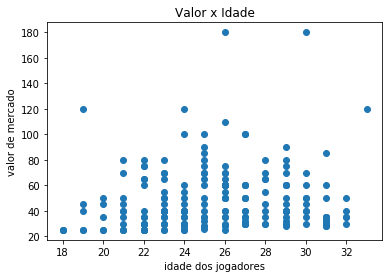

In [160]:
x = plt.scatter(dados_filtro['idade'], dados_filtro['valor'] )
plt.xlabel('idade dos jogadores')
plt.ylabel('valor de mercado')
plt.title('Valor x Idade')
plt.show(x)


O gráfico acima nos mostra como a idade de um jogador influencia no valor dele. Podemos ver que a maioria dos 200 jogadores mais valiosos se encontra na faixa dos 24 aos 26 anos que é, normalmente, a idade em que os jogadores possuem o auge de suas carreiras. Os jogadores que possuem idade abaixo dessa faixa, são jogadores considerados promissores, alguns deles podendo chegar entre os melhores do mundo futuramente, por isso possuem valores altos já com essa idade. Os jogadores que com 28 anos ou mais ainda são valiosos, são, em sua maioria, jogadores já consagrados no futebol e que conseguem manter um alto nível de futebol. Podemos observar que são poucos os que conseguem se manter nos top 200, com idade mais "avançada" (acima dos 30 anos), pois, além da natural queda de rendimento, o jogador deixa de ser considerado um investimento de longo prazo.

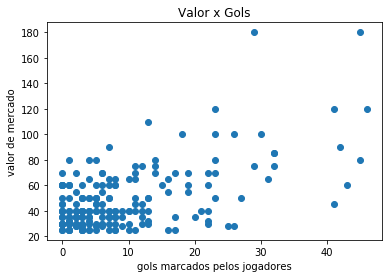

In [161]:
k = plt.scatter(dados_filtro['gols'], dados_filtro['valor'] )
plt.xlabel('gols marcados pelos jogadores')
plt.ylabel('valor de mercado')
plt.title('Valor x Gols')
plt.show(k)

O gráfico acima nos mostra como os gols marcados por um jogador pode influenciar em seu valor. Neste gráfico há mais coisas necessárias pra se levar em conta: jogadores de defesa tendem a fazer poucos gols na temporada e goleiros dificilmente farão algum gol na temporada. Por esses motivos boa parte dos jogadores mais valiosos possuem menos de 10 gols na temporada. Mesmo assim, podemos perceber o valor dos jogadores que possuem mais gols tende a ser maior, além da maioria dos jogadores com menos de 10 gols estar concentrada em valores de 40M€ pra baixo, os jogadores com mais de 20 gols estão em boa parte acima dos 60M€.

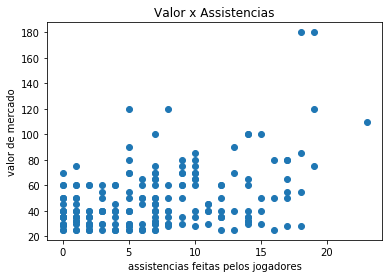

In [162]:
u = plt.scatter(dados_filtro['assistencias'] , dados_filtro['valor'])
plt.xlabel('assistencias feitas pelos jogadores')
plt.ylabel('valor de mercado')
plt.title('Valor x Assistencias')
plt.show(u)

O gráfico acima nos mostra como as assistências de um jogador pode influenciar em seu valor. Por mais que estejam mais distribuídos, é perceptível que conforme mais assistências o jogador deu, maior seu valor de mercado. Dos 20 jogadores quem valem pelo menos 80M€, 14 deles deram pelo menos 10 assistências na temporada.

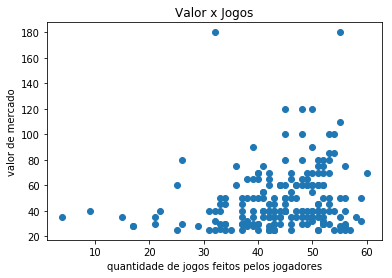

In [163]:
i = plt.scatter(dados_filtro['jogos'] , dados_filtro['valor'])
plt.xlabel('quantidade de jogos feitos pelos jogadores')
plt.ylabel('valor de mercado')
plt.title('Valor x Jogos')
plt.show(i)

O gráfico acima nos mostra como a quantidade de jogos disputados por um jogador pode influenciar em seu valor. Como o gráfico mostra bem, dificilmente um jogador que faça poucos jogos venha a ser valioso, pois os jogadores mais valiosos tendem a ser os melhores e, portanto os mais utilizados. As raras excessões podem ser jogadores que tiveram graves lesões e perderam a maioria da temporada ou jogadores que tiveram boas temporadas anteriormente porém viraram reservas de jogadores melhores em grandes clubes.

C:\Users\Gustavo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


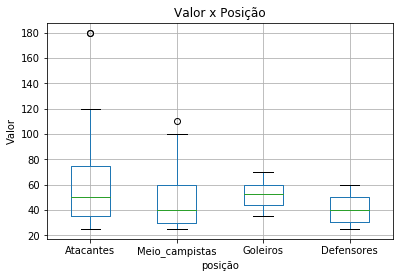

In [164]:
dados_filtro['posição'][(dados_filtro['posição'] ==1) | (dados_filtro['posição'] ==2) | (dados_filtro['posição']==3)] = [1]
dados_filtro['posição'][(dados_filtro['posição'] ==4) | (dados_filtro['posição'] ==5) | (dados_filtro['posição']==6) | (dados_filtro['posição']==7) | (dados_filtro['posição'] ==12) | (dados_filtro['posição'] ==13)] = [2]
dados_filtro['posição'][(dados_filtro['posição'] ==8)] = [3]
dados_filtro['posição'][(dados_filtro['posição'] ==9) | (dados_filtro['posição'] ==10) | (dados_filtro['posição']==11)] = [4] 

dados_filtro['posição']=dados_filtro['posição'].astype("category")
dados_filtro['posição'].cat.categories=("Atacantes","Meio_campistas","Goleiros","Defensores")

w = dados_filtro.boxplot(column='valor',by='posição')
plt.suptitle("")
plt.title('Valor x Posição')
plt.ylabel('Valor')
plt.show(w)

O gráfico acima nos mostra como a posição de um jogador pode influenciar em seu valor. Podemos perceber a partir do gráfico que os jogadores de posições mais ofensivas (atacantes e meio campistas), tendem a possuir um valor de mercado maior do que os de posições mais defensivas. Isso se da devido ao fato de eles serem os principais responsáveis para que o time marque gols. Defensores e Goleiros, por mais que muito importantes a um time, tendem a ser desvalorizados em relação ao seu valor pois os homens de frente que normalmente ganham os holofotes.

In [165]:
#Dividindo a base de dados em 90% para treinamento e 10% para teste
treinamento, teste = train_test_split(dados_filtro, test_size=0.1)
teste.head()

,posição,idade,valor,jogos,gols,assistencias
154,Defensores,22,30,38,0,5
199,Meio_campistas,24,25,51,8,3
82,Atacantes,21,45,37,11,7
192,Defensores,22,25,42,1,4
58,Defensores,29,60,44,3,4


In [166]:
treinamento.head()

,posição,idade,valor,jogos,gols,assistencias
188,Defensores,18,25,42,3,5
5,Meio_campistas,26,110,55,13,23
50,Defensores,26,60,48,1,8
116,Meio_campistas,29,40,37,2,2
172,Atacantes,24,28,55,25,17


___
## MODELOS DE PREDIÇÃO

Agora iremos criar modelos de predição que irão prever o valor do jogador com base em seus números da temporada (jogos, gols e assistências), sua idade e sua posição. Faremos dois destes modelos, um mais simples e menos preciso e um mais sofisticado e com uma melhor precisão e perfomance. Esses modelos estão listados abaixo respectivamente.

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)


Modelo de Predição pela Média:

In [167]:
#Modelo de Predição pela média
#Achando a média dos valores de mercado de cada jogador
media=treinamento['valor'].mean()
print(media)

50.03888888888889


In [168]:
#Aplicando o R^2
valor = (teste['valor'] - media)**2
r2 = 1 - (valor.sum()/valor.sum())
r2

0.0

Para o modelo de predição pela média, o r2 sempre será igual a 0, ja que o mesmo ao fazer as contas da somatoria, realiza os mesmos tipos de calculo resultando em 1-1 = 0

In [169]:
#Aplicando o RMS
rms = (valor.sum()/20)**0.5
rms

17.05818021788019

Modelo de Regressão Linear:

Fazendo a regressão pelo sklearn

In [170]:
#Separar em variáveis independentes e a variável dependente
X = dados_filtro.iloc[0:,[0,1,3,4,5]].values #Variáveis independentes
y = dados_filtro.iloc[0:,2].values #Variável dependente (Valor do jogador)

In [171]:
#Codificação da variável posição (de string para float)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

In [172]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.1, random_state = 0)

In [173]:
#Aplicando a Regressão Linear Multipla noa base trenamento
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [174]:
#Prevendo os resultados dos dados teste
y_pred = regressor.predict(X_teste)
y_pred

array([ 32.65587543,  35.08483692,  36.84098629,  43.17638167,
        40.96293494,  55.08098753,  68.58821445,  54.38969712,
        77.829266  ,  46.49009046,  59.980539  ,  39.5181545 ,
        53.77925603,  39.83040632,  51.0680825 ,  80.61775404,
        64.32501166,  47.58372588,  47.80729869,  46.99688492])

In [175]:
#Transformado o array(predição dos valores) e a coluna(teste['valor']) em lista
lista_y = y_pred.tolist()
lista_v = teste['valor'].tolist()
media2 = 0
for i in range(len(lista_v)):
    media2 = media2 +lista_v[i]
media_f = media2/20
lista_R = []
for j in range(len(lista_y)):
    R12 = (lista_v[j] - lista_y[j])**2
    lista_R.append(R12)
teste['valor_estipulado'] = lista_R
div_f0 = teste['valor_estipulado'].sum()


In [176]:
#Calculando o RMS
RMS2 = (div_f0/20)**0.5
print('O valor de RMS na regressão linear é {0}'.format(RMS2))

O valor de RMS na regressão linear é 22.30639372234761


Nosso valor de RMS não está muito aceitavel, tendo em vista que valores mais proximos de 0 são ideias, estes mostram que a regressão esta mais próxima do real

In [177]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

Fazendo a regressão pelo stats.model OLS

In [178]:
#Fazendo a regressão por OLS e printando o Summary
regr = ols('valor ~ posição + idade + jogos + gols + assistencias',data = treinamento).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  valor   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     16.63
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           1.16e-16
Time:                        23:23:01   Log-Likelihood:                -789.48
No. Observations:                 180   AIC:                             1595.
Df Residuals:                     172   BIC:                             1620.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    14.0728     13.489      1.043      0.298     -12.552      40.697
posição[T.Meio_campistas]     7.6906      4.370      1.760      0.080      -0.936      16.317
posição[T.Goleiros]          31.7203      8.847      3.585      0.000      14.258      49.183
posição[T.Defensores]        12.7838      5.326      2.400      0.017       2.271      23.296
idade                         0.3815      0.450      0.847      0.398      -0.507       1.270
jogos                        -0.0942      0.177     -0.533      0.594      -0.443       0.254
gols                          1.4541      0.206      7.075      0.000       1.048       1.860
assistencias                  1.2961      0.368      3.526      0.001       0.571       2.022
==============================================================================
Omnibus:                       34.495   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.782
Skew:                           0.787   Prob(JB):                     1.94e-20
Kurtosis:                       6.103   Cond. No.                         484.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
#Calculando o RMS e o R2 da regressão por OLS
pred = regr.predict(teste)

lista_p = pred.tolist()
lista_V = []
for c in range(len(lista_p)):
    R123 = (lista_v[c] - lista_p[c])**2
    lista_V.append(R123)
teste['valor_est'] = lista_V
soma = teste['valor_est'].sum()

RMS3 = (soma/20)**0.5
print('O valor de RMS na regressão linear é {0}'.format(RMS3))
print('O valor de R2 na regressão linear é {0}'.format(regr.rsquared))

O valor de RMS na regressão linear é 15.759537822897505
O valor de R2 na regressão linear é 0.40360727790018813


Nosso valor de RMS não está muito aceitavel, tendo em vista que valores mais proximos de 0 são ideias, estes mostram que a regressão esta mais próxima do real
Nosso valor de R2 tambem nao é um bom valor, ja que o mesmo quanto mais proximo de 1, mais a regressão representa a realidade dos dados utilizados

___
## CONCLUSÃO

Após análise dos resultados gerados pelo modelo de regressão linear e de seus testes de performance podemos verificar que os valores de mercado gerados por ele, não coincidem com os valores reais dos jogadores, porém isso não quer dizer que o modelo de predição esta ruim. O modelo gera quais seriam os valores dos jogadores baseado apenas em numeros da temporada atual, idade e posição do jogador, não considerando como o jogador se saiu em temporadas passadas, afinal um jogador começa uma nova temporada com seu valor baseado no que ja fez em temporadas anteriores. Fatores como clube em que joga e disciplina do jogador também são fatores importantes que influenciam em seu valor de mercado.

___
## REFERÊNCIAS BIBLIOGRÁFICAS

https://stackoverflow.com/



https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/

https://www.transfermarkt.pt/